In [278]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### 1/ generate datasets

In [279]:
import sklearn.datasets

In [280]:
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [281]:
# signmoid function
def sigmoid(x):
    '''
    Compute the sigmoid of x
    
    Arguments:
    x -- A scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(x)
    '''
    s = 1/(1+np.exp(-x))
    return s

In [282]:
x = tf.range(10)
x

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [283]:
sigmoid(x)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

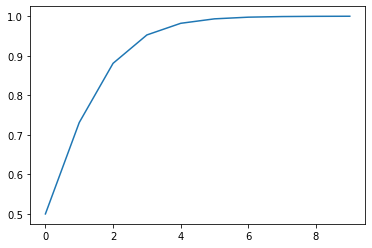

In [284]:
plt.plot(sigmoid(x))

In [285]:
np.random.seed(1)

m = 400 # number of examples
K = 3 # number of classes
noise = 0.3 # noise
N = int(m/K) # number of point perclass
D = 2 # dimensionality

X = np.zeros((m,D)) # data matrix each row is a single example
y = np.zeros((m,1),dtype = 'uint8') # labels vector (0 for red, 1 for blue)
a = 4 # maximum ray of the flower

for j in range(K):
    ix =range(N*j,N*(j+1))
    r = np.linspace(0,0.1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N) *noise # theta
    X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
    y[ix] = j    

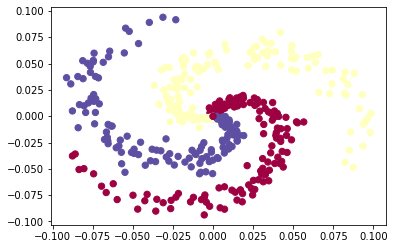

In [286]:
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=y,s = 40,cmap = plt.cm.Spectral)
plt.show()

In [287]:
def load_planar_dataset(m=400,K=2,noise = 0.3):
    '''
    Create planar dataset (features,label)
    
    Arguments    
    m     --- number of examples
    K     --- number of classes
    noise --- noise
    
    Return:
    X --- the input
    y --- the labels
    '''
    m = m
    K = K
    noise = noise
    N = int(m/K) # number of point perclass
    D = 2 # dimensionality

    X = np.zeros((m,D)) # data matrix each row is a single example
    y = np.zeros((m,1),dtype = 'uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(K):
        ix =range(N*j,N*(j+1))
        r = np.linspace(0,0.1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N) *noise # theta
        X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
        y[ix] = j
    return X,y

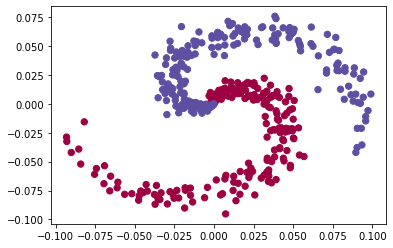

In [288]:
X,y = load_planar_dataset(K=2)
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=y,s = 40,cmap = plt.cm.Spectral)
plt.show()

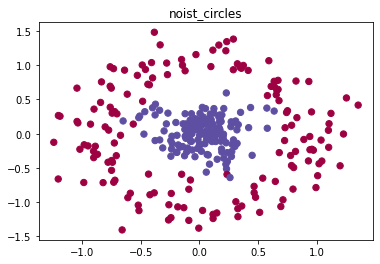

In [289]:
X,y = sklearn.datasets.make_circles(n_samples = 300, factor = 0.2, noise = 0.2)
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=y,s = 40,cmap = plt.cm.Spectral)
plt.title("noist_circles")
plt.show()

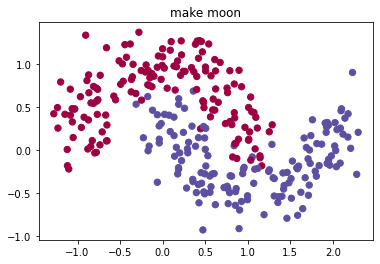

In [290]:
X,y = sklearn.datasets.make_moons(n_samples = 300, noise = .2)
plt.scatter(X[:,0],X[:,1],c = y,s = 40,cmap = plt.cm.Spectral)
plt.title("make moon")
plt.show()

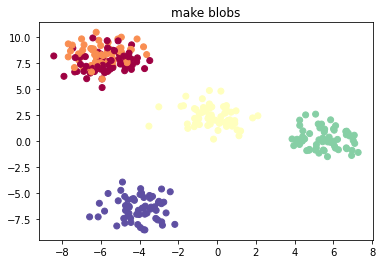

In [291]:
X,y = sklearn.datasets.make_blobs(n_samples = 300, random_state = 5, n_features = 2,centers = 5)
plt.scatter(X[:,0],X[:,1],c =y,cmap =plt.cm.Spectral)
plt.title("make blobs")
plt.show()

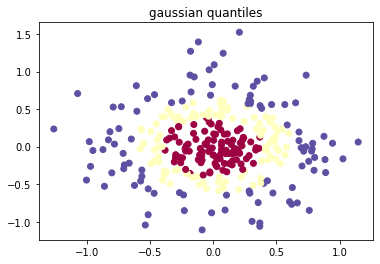

In [292]:
X,y = sklearn.datasets.make_gaussian_quantiles(mean = None,
                                               cov = 0.2,
                                               n_samples =300,
                                               n_features =2,
                                               n_classes = 3,
                                               shuffle = True,
                                              random_state = None)
plt.scatter(X[:,0],X[:,1],c =y,cmap =plt.cm.Spectral)
plt.title("gaussian quantiles")
plt.show()

In [959]:
def plot_decision_boundary(model,X,y,title = 'boundary decision'):
    '''
    Draw the boundary predicted on the dataset
    
    Arguments
    model --- your neural network model
    X     --- the features
    y     --- the labels
    
    Returns
    The plot of decision boundary
    '''
    # Set min,max values and give it some padding
    padding = 0.1
    x_min,x_max = X[:,0].min()-padding,X[:,0].max()+ padding
    y_min,y_max = X[:,1].min()-padding,X[:1].max()+padding
    # Generate a grid of points with distance h between them, you can use np.linspace
    step = 0.01
    xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
    # Predict the function value for the whole grid
    x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2d become the features
    y_pred = np.round(model.predict(x_in)) # y_preds = model.predict(x_in)
    # plot the contour and  training examples
    plt.contourf(xx,yy,y_pred.reshape(xx.shape),cmap =plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c =y,cmap = plt.cm.Spectral)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.show()

### 2/ binary classification neural network of tensorflow

In [294]:
from sklearn.model_selection import train_test_split

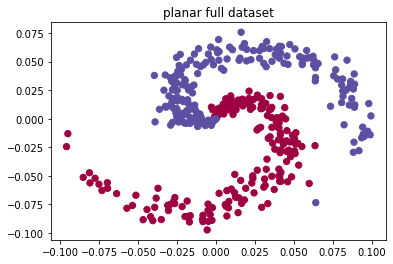

In [295]:
# create dataset
X,y = load_planar_dataset(K=2,m = 400)
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=y,s = 40,cmap = plt.cm.Spectral)
plt.title("planar full dataset")
plt.show()

In [296]:
X.shape,y.shape

((400, 2), (400, 1))

In [297]:
# split the
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 11)

In [298]:
X_train.shape,y_train.shape

((320, 2), (320, 1))

In [299]:
X_test.shape,y_test.shape

((80, 2), (80, 1))

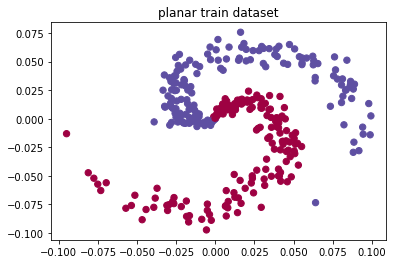

In [300]:
# let visualize the data:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s = 40,cmap = plt.cm.Spectral)
plt.title("planar train dataset")
plt.show()

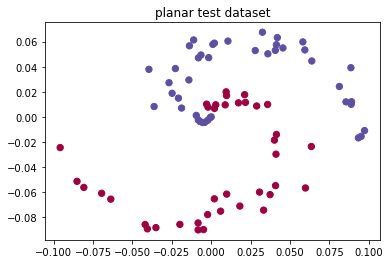

In [301]:
# let visualize the data:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,s = 40,cmap = plt.cm.Spectral)
plt.title("planar test dataset")
plt.show()

In [302]:
# Check the normalization
X[:,0].min(),X[:,0].max()

(-0.09592317162349749, 0.09946710484920965)

In [303]:
X[:,1].min(),X[:,1].max()

(-0.09732352393325626, 0.07568277325374162)

In [304]:
# 1/import the necessary libreies
from tensorflow.keras.utils import plot_model

In [305]:
# 2/create a random set
tf.random.set_seed(11)

# 3/ build model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

# 4/ compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ['accuracy','binary_crossentropy'])

In [306]:
# 5/ train the model
history = model.fit(X_train,y_train,epochs = 200,verbose = 1)

Epoch 1/200
10/10 [==============================] - 1s 2ms/step - loss: 0.7847 - accuracy: 0.5063 - binary_crossentropy: 0.7847
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 0.7226 - accuracy: 0.5063 - binary_crossentropy: 0.7226
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5063 - binary_crossentropy: 0.6949
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5063 - binary_crossentropy: 0.6926
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5000 - binary_crossentropy: 0.6927
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4938 - binary_crossentropy: 0.6934
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.4938 - binary_crossentropy: 0.6928
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.568

10/10 [==============================] - 0s 4ms/step - loss: 0.4912 - accuracy: 0.7188 - binary_crossentropy: 0.4912
Epoch 64/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7375 - binary_crossentropy: 0.4815
Epoch 65/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7250 - binary_crossentropy: 0.4790
Epoch 66/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7000 - binary_crossentropy: 0.4727
Epoch 67/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7250 - binary_crossentropy: 0.4711
Epoch 68/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7156 - binary_crossentropy: 0.4642
Epoch 69/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7188 - binary_crossentropy: 0.4622
Epoch 70/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7031 - b

10/10 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7188 - binary_crossentropy: 0.4273
Epoch 126/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7250 - binary_crossentropy: 0.4280
Epoch 127/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7219 - binary_crossentropy: 0.4281
Epoch 128/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7219 - binary_crossentropy: 0.4272
Epoch 129/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7125 - binary_crossentropy: 0.4277
Epoch 130/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7219 - binary_crossentropy: 0.4269
Epoch 131/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7188 - binary_crossentropy: 0.4273
Epoch 132/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7

10/10 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.7219 - binary_crossentropy: 0.4218
Epoch 188/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.7406 - binary_crossentropy: 0.4220
Epoch 189/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7156 - binary_crossentropy: 0.4225
Epoch 190/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7281 - binary_crossentropy: 0.4227
Epoch 191/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.7375 - binary_crossentropy: 0.4223
Epoch 192/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7156 - binary_crossentropy: 0.4238
Epoch 193/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7219 - binary_crossentropy: 0.4228
Epoch 194/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7

In [227]:
# 6/ Evaluate model
model.evaluate(X_test,y_test,verbose = 1)

3/3 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.7000 - binary_crossentropy: 0.4157


[0.4156932830810547, 0.699999988079071, 0.4156932830810547]

<AxesSubplot:title={'center':'loss curve'}>

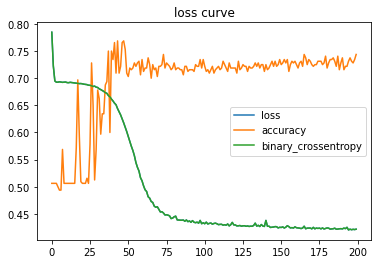

In [228]:
# 7/ loss curve
pd.DataFrame(history.history).plot(title = 'loss curve')

In [229]:
# 8/ summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 12        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


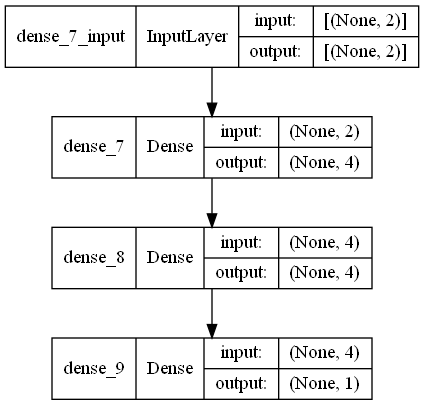

In [230]:
# 9/ show the plot of model
plot_model(model,show_shapes =True)

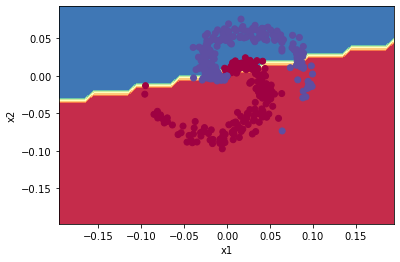

In [231]:
# 10/ plot the boundary 
plot_decision_boundary(model,X,y)

### 3/ binary classification neural network

In [309]:
import pandas as pd 
import numpy as np 

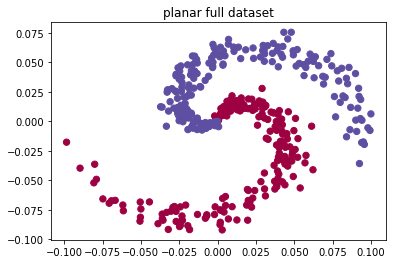

In [310]:
# create dataset
X,y = load_planar_dataset(K=2,m = 400)
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=y,s = 40,cmap = plt.cm.Spectral)
plt.title("planar full dataset")
plt.show()

In [311]:
# split the
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 11)

In [556]:
# define sigmoid function
def sigmoid(x):
    '''
    Return the value of x in sigmoid function
    
    Arguments:
    x --- array or scalar
    
    Returns:
    sigmoid(x)
    '''
    return 1/(1+np.exp(-x))

# define derivative of function
def sigmoid_derivative(x):
    '''
    Return the value of x in derivative of sigmoid function
    
    Arugments:
    x --- array or scalar
    
    Returns:
    detivative of sigmoid function
    '''
    return x * (1-x)

# define the tanh function
def tanh(x):
    '''
    Calculate tanh function
    
    Parameters:
    X --- scalar or array
    
    Return:
    tanh(X) --- the value of tanh X
    '''
    return np.tanh(x)

# define the derivative of tanh function
def tanh_derivative(x):
    '''
    Return the value of x in derivative of sigmoid function
    
    Arugments:
    x --- array or scalar
    
    Returns:
    detivative of sigmoid function
    '''
    return 1 - x**2

In [313]:
class NeuralNetwork:
    '''
    Neural Network with only sigmoid activation function
    
    Arguments:
    layers --- the list of node number each layer (example: [2,2,1])
    lr     --- the learning_rate (default = 0.1)
    
    Return:
    Object neural network
    '''
    def __init__(self,layers,lr = 0.1):
        '''
        The initalize function
        
        Arguments:
        layers --- the list of node number each layer
        lr     --- the learning_rate (default = 0.1)

        Return:
        Object neural network
        '''
        self.dim = 2 # the diemension of planar features
        self.layers = [self.dim] + layers # the layer of model
        self.lr = lr # the learning rate
        self.history = {"history":[]}
        # list of W and b
        self.W = [] # the weight
        self.b = [] # the bias
        # initiate value of weight and bias, except the input layer
        for i in range(len(self.layers)-1):
            w_ = np.random.randn(self.layers[i],self.layers[i+1]) # gaussian distribution
            b_ = np.zeros((self.layers[i+1],1)) # zeros at the beginning
            self.W.append(w_)
            self.b.append(b_)
    
    def __repr__(self):
        '''
        Summary model paramters and layers
        
        Arguments:
        None
        
        Return:
        String of summary
        '''
        summary_str = "\n"
        total_param = 0 # total parameters of the model
        for i in range(len(self.layers)):
            if i == 0: # if that is the input layers
                summary_str += f"layer: {i} weight: {0} bias: {0} total: {0}\n"
                total_param += 0 
            else:
                summary_str += f"layer: {i} weight: {self.layers[i-1]*self.layers[i]} bias: {self.layers[i]} total: {self.layers[i]*(self.layers[i-1]+1)}\n"
                total_param += self.layers[i] * (self.layers[i-1]+1) 
        summary_str += f"Total: {total_param}"
        return f"Neural Network [{summary_str}]"
    
    def predict(self,X):
        '''
        Predict the labels (do the feedforward) 
        
        Arguments:
        X -- input or features (n_samples,n_dimensions)
        
        Return:
        X -- predicted labels (n_samples,1)
        '''
        for i in range(0,len(self.layers) - 1):
            X = sigmoid(np.dot(X,self.W[i]) + self.b[i].T)
        return X
    
    def evaluate(self,X,y):
        '''
        Calculate loss between predicted labels and ground truth label
        
        Arguments:
        X -- input or features (n_samples,n_dimensions)
        y -- the ground truth
        
        Return:
        loss -- the loss value
        '''
        y_predict = self.predict(X)
        return -(np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict)))
    
    def fit_partial(self,x,y):
        '''
        Train model each epoch include feedforward and back propagation
        
        Arguments:
        x --- input or features (n_samples,n_dimensions)
        y --- output or labels (n_samples,1)
        
        Return:
        None
        '''
        A = [x] # create the new list of A examples: layers = [2,1] A = [x,a1,a2] 
        # feedforward
        out = A[-1]
        for i in range(0,len(self.layers)-1):
            out = sigmoid(out @ self.W[i] + self.b[i].T)
            A.append(out)
        
        # backprogation
        dA = [ -(y/A[-1] - (1-y)/(1-A[-1])) ] # list of a deriviation, the first is [dA2,]
        dW = []
        db = []
        for i in reversed(range(0,len(self.layers) - 1)):
            dw_ = A[i].T @ (dA[-1] * sigmoid_derivative(A[i+1]))
            db_ =   (np.sum(dA[-1] * sigmoid_derivative(A[i+1]),0)).reshape(-1,1)
            dA_ =          (dA[-1] * sigmoid_derivative(A[i+1])) @ self.W[i].T
            dW.append(dw_)
            db.append(db_)
            dA.append(dA_)
            
        # invert the order of dW,db [dW1,dW0] -> [dW0,dW1]
        dW = dW[::-1]
        db = db[::-1]
        
        # Gradient descent
        for i in range(0,len(self.layers)-1):
            self.W[i] = self.W[i] - self.lr * dW[i]
            self.b[i] = self.b[i] - self.lr * db[i]
    
    def fit(self,X,y,epochs =20,verbose =1,milestone = 10):
        '''
        Train the model
        
        Arguments:
        X         --- input or features (n_samples,n_dimensions)
        y         --- ground truth label
        epochs    --- the number of time you train your epoch (default = 20)
        verbose   --- decide to print out while training or not (default = 1)
        milestone --- print out the result if current epoch % milestone and verbose is true
        
        Return:
        None
        '''
        self.history['history'] = [] # empty the loss history
        for epoch in range(0,epochs):
            self.fit_partial(X,y)
            loss = self.evaluate(X,y)
            self.history['history'].append(loss)
            if (verbose) and (epoch % milestone == 0):
                print("Epoch {},loss {}".format(epoch,loss))
                        

In [503]:
model = NeuralNetwork(layers = [2,1],lr = 0.01)

In [509]:
list(reversed(range(4-1)))

[2, 1, 0]

In [504]:
model.layers

[2, 2, 1]

In [505]:
model.__repr__

<bound method NeuralNetwork.__repr__ of Neural Network [
layer: 0 weight: 0 bias: 0 total: 0
layer: 1 weight: 4 bias: 2 total: 6
layer: 2 weight: 2 bias: 1 total: 3
Total: 9]>

In [506]:
model.W

[array([[ 0.44181875,  0.36592188],
        [-1.76941915, -0.1261901 ]]),
 array([[-1.13580655],
        [-1.06063511]])]

In [318]:
for i in range(len(model.W)):
    print(model.W[i].shape,model.b[i].shape)

(2, 2) (2, 1)
(2, 1) (1, 1)


In [319]:
y_train.shape

(320, 1)

In [320]:
model.fit_partial(X_train,y_train)

In [321]:
model.evaluate(X_test,y_test)

55.59398560534824

In [243]:
model.fit(X_train,y_train,verbose =1,epochs = 100, milestone = 10)

Epoch 0,loss 221.8526680540523
Epoch 10,loss 221.70813218967476
Epoch 20,loss 221.56479931578886
Epoch 30,loss 221.41747276589393
Epoch 40,loss 221.26164482212806
Epoch 50,loss 221.0926628356653
Epoch 60,loss 220.9055885538579
Epoch 70,loss 220.69505913507646
Epoch 80,loss 220.45514846140463
Epoch 90,loss 220.17922905513876


In [244]:
dir(model.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

<AxesSubplot:title={'center':'neural_network'}>

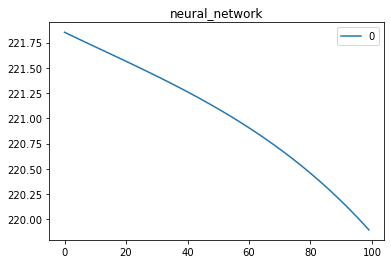

In [245]:
pd.DataFrame(model.history['history']).plot(title = 'neural_network')

In [322]:
model = NeuralNetwork(layers = [4,4,1],lr = 0.005)

In [323]:
model.__repr__

<bound method NeuralNetwork.__repr__ of Neural Network [
layer: 0 weight: 0 bias: 0 total: 0
layer: 1 weight: 8 bias: 4 total: 12
layer: 2 weight: 16 bias: 4 total: 20
layer: 3 weight: 4 bias: 1 total: 5
Total: 37]>

In [324]:
model.fit(X_train,y_train,verbose =1,epochs = 50000, milestone = 5000)

Epoch 0,loss 222.157479350147
Epoch 5000,loss 118.70690929289977
Epoch 10000,loss 114.30540096093453
Epoch 15000,loss 111.86423819055673
Epoch 20000,loss 107.64304335168832
Epoch 25000,loss 52.38091071190902
Epoch 30000,loss 40.95956406231892
Epoch 35000,loss 33.078166407596996
Epoch 40000,loss 27.705220106462857
Epoch 45000,loss 18.450791342238062


<AxesSubplot:title={'center':'neural_network'}>

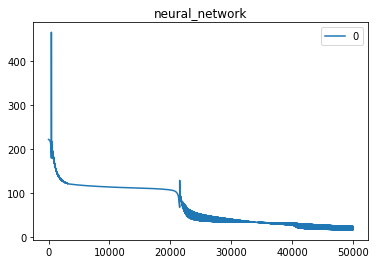

In [325]:
pd.DataFrame(model.history['history']).plot(title = 'neural_network')

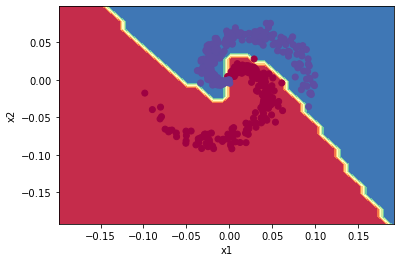

In [326]:
# 10/ plot the boundary 
plot_decision_boundary(model,X,y)

In [166]:
# test the parameters of the model
tf_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(3,activation = 'sigmoid'),
    tf.keras.layers.Dense(2,activation = 'sigmoid'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

tf_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = tf_model.fit(X_train,y_train,epochs = 10,verbose = 0)

<AxesSubplot:title={'center':'loss curve'}>

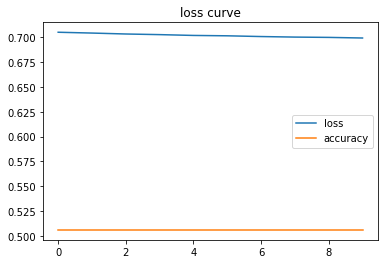

In [275]:
pd.DataFrame(history.history).plot(title = 'loss curve')

In [276]:
tf_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (32, 2)                   6         
                                                                 
 dense_50 (Dense)            (32, 1)                   3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


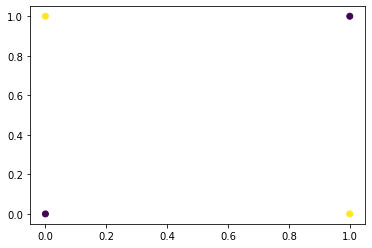

In [468]:
# train with XOR problem
X_xor  = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
# the labels
y_xor = np.array([[0],
            [1],
            [1],
            [0]])

# visualize datasets
plt.scatter(X_xor[:,0],X_xor[:,1],c = y_xor)

In [469]:
# create the model
model_xor = model = NeuralNetwork(layers = [2,1],lr = 0.01)

In [470]:
model_xor.__repr__

<bound method NeuralNetwork.__repr__ of Neural Network [
layer: 0 weight: 0 bias: 0 total: 0
layer: 1 weight: 4 bias: 2 total: 6
layer: 2 weight: 2 bias: 1 total: 3
Total: 9]>

In [471]:
model.fit(X_xor,y_xor,verbose =1,epochs = 30000, milestone = 2000)

Epoch 0,loss 3.044380850128967
Epoch 2000,loss 2.768495462269912
Epoch 4000,loss 2.757444464561073
Epoch 6000,loss 2.6944633114998955
Epoch 8000,loss 2.4455169353257857
Epoch 10000,loss 2.112708373778248
Epoch 12000,loss 1.3646751829678916
Epoch 14000,loss 0.6877204990186983
Epoch 16000,loss 0.42310633568132827
Epoch 18000,loss 0.2986576082480541
Epoch 20000,loss 0.228602796973517
Epoch 22000,loss 0.1842862591681601
Epoch 24000,loss 0.1539416343931528
Epoch 26000,loss 0.13195301759718184
Epoch 28000,loss 0.1153307050586743


<AxesSubplot:title={'center':'neural_network'}>

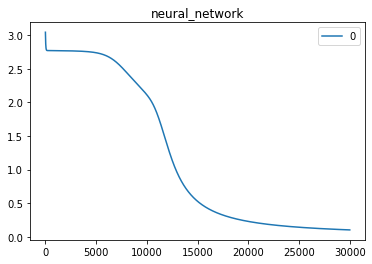

In [472]:
pd.DataFrame(model.history['history']).plot(title = 'neural_network')

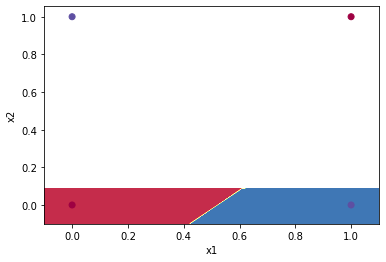

In [474]:
# 10/ plot the boundary 
plot_decision_boundary(model_xor,X_xor,y_xor)

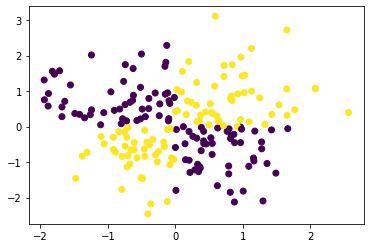

In [494]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] < 0, X_xor[:, 1] > 0).astype(int).reshape(-1,1)

# visualize datasets
plt.scatter(X_xor[:,0],X_xor[:,1],c = y_xor)

In [495]:
X_train,X_test,y_train,y_test = train_test_split(X_xor,y_xor,test_size = 0.2, random_state = 11)

In [496]:
# create the model
model_xor = NeuralNetwork(layers = [2,4,1],lr = 0.05)

In [497]:
model_xor.fit(X_train,y_train,verbose =1,epochs = 10000, milestone =1000)

Epoch 0,loss 362.3678162615281
Epoch 1000,loss 4.062534593893074
Epoch 2000,loss 2.882122501441534
Epoch 3000,loss 2.4570544532477268
Epoch 4000,loss 0.36799596715815686
Epoch 5000,loss 0.17787692876876154
Epoch 6000,loss 0.11790590263978178
Epoch 7000,loss 0.08722903115482553
Epoch 8000,loss 0.0687194344536492
Epoch 9000,loss 0.05639246962278929


<AxesSubplot:title={'center':'neural_network'}>

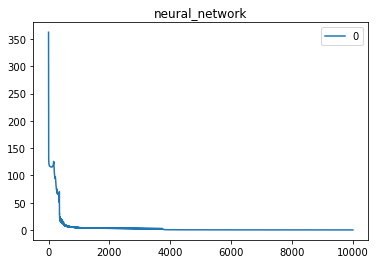

In [498]:
pd.DataFrame(model_xor.history['history']).plot(title = 'neural_network')

In [499]:
model_xor.evaluate(X_test,y_test)

3.5930705994570453

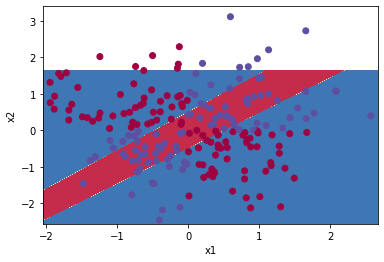

In [500]:
# 10/ plot the boundary 
plot_decision_boundary(model,X_xor,y_xor)

### 4/ binary classification neural network from course

# Planar data classification with one hidden layer

Welcome to your week 5 programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [854]:
X,Y = load_planar_dataset()
len(X),len(Y)

(400, 400)

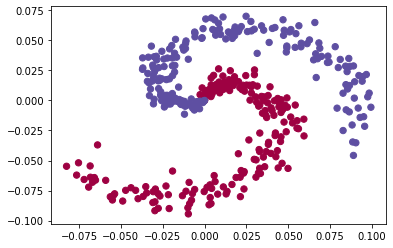

In [855]:
# visualize the data
plt.scatter(X[:,0],X[:,1],c = Y.ravel(),s = 40, cmap = plt.cm.Spectral)

In [856]:
shape_X = X.shape
shape_Y = Y.shape
m = len(X)

print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print('I have m = %d trainining examples!' %(m))

The shape of X is: (400, 2)
The shape of Y is: (400, 1)
I have m = 400 trainining examples!


## 3 - Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [857]:
import sklearn.linear_model

In [858]:
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_passive_aggressive',
 '_perceptron',
 '_ransac',
 '_ridge',
 '_sag',
 '_

In [859]:
# train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
y_preds = clf.fit(X,Y.ravel())
y_preds

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

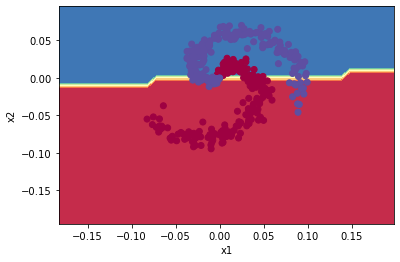

In [860]:
# 10/ plot the boundary 
plot_decision_boundary(clf,X,Y)

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
![image.png](attachment:image.png)

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####

**Exercise**: Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [915]:
def layer_sizes(X,Y):
    '''
    Return the size of input layer, the size of the hidden layer, the size of output layer
    
    Arguments:
    X --- the features
    Y --- the labels
    
    Return:
    n_x --- the dimension of input layer
    n_h --- the node number in hidden layer
    n_y --- the node number in output layer
    '''
    n_x = X.shape[-1] 
    n_h = 4
    n_y = Y.shape[-1] 
    return (n_x,n_h,n_y)

In [916]:
n_x,n_h,n_y = layer_sizes(X,Y)

print('The size of input layer is n_x = ' + str(n_x))
print('The size of input layer is n_h = ' + str(n_h))
print('The size of input layer is n_y = ' + str(n_y))

The size of input layer is n_x = 2
The size of input layer is n_h = 4
The size of input layer is n_y = 1


### 4.2 - Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

In [917]:
def initialize_parameters(n_x,n_h,n_y):
    '''
    Arguments:
    n_x --- the dimension of input layer
    n_h --- the node number in hidden layer
    n_y --- the node number in output layer
    
    Return:
    param --- python dictionary containing your parameters:
                W1 --- weights matrix of shape (n_x,n_h)
                b1 --- bias vector of shape (n_h,1)
                W2 --- weight matrix of shape (n_h,n_y)
                b2 --- bias vector of shape (n_y,1)
    '''
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random
    W1 = np.random.randn(n_x,n_h) * 0.01
    b1 = np.random.randn(n_h,1) * 0.01
    W2 = np.random.randn(n_h,n_y) * 0.01
    b2 = np.random.randn(n_y,1) * 0.01
    
    assert (W1.shape == (n_x,n_h))
    assert (b1.shape == (n_h,1))
    assert (W2.shape == (n_h,n_y))
    assert (b2.shape == (n_y,1))
    
    parameters = {"W1":W1,
                 "b1":b1,
                 "W2":W2,
                 "b2":b2}
    
    return parameters

In [918]:
n_x,n_h,n_y = layer_sizes(X,Y)

parameters = initialize_parameters(n_x,n_h,n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267 -0.02136196  0.01640271]
 [-0.01793436 -0.00841747  0.00502881 -0.01245288]]
b1 = [[-0.01057952]
 [-0.00909008]
 [ 0.00551454]
 [ 0.02292208]]
W2 = [[ 0.00041539]
 [-0.01117925]
 [ 0.00539058]
 [-0.0059616 ]]
b2 = [[-0.0001913]]


In [919]:
print("W1 = " + str(parameters["W1"].shape))
print("b1 = " + str(parameters["b1"].shape))
print("W2 = " + str(parameters["W2"].shape))
print("b2 = " + str(parameters["b2"].shape))

W1 = (2, 4)
b1 = (4, 1)
W2 = (4, 1)
b2 = (1, 1)


### 4.3 - The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [920]:
# forward_propagation

def forward_propagation(X,parameters):
    '''
    feedforward calculate
    
    Arguments:
    X          --- input data of size(m,n_x)
    parameters --- python dictionary containing your parameters (output of initialization function)
    
    Return:
    A2 --- The sigmoid output of the second activation
    cache --- a dictionary containing "Z1","A1","Z2","A2"
    '''
    # Retrieve each parameter from the dictionary 'parameters'
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = X @ W1 + b1.T
    A1 =  np.tanh(Z1) #sigmoid(Z1)
    Z2 = A1 @ W2 + b2.T
    A2 = sigmoid(Z2)
    
    assert len(X) == len(A2)
    
    cache = {
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2
    }
    return A2, cache

In [921]:
A2,cache =forward_propagation(X,parameters)

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).


In [922]:
def compute_cost(A2,Y):
    '''
    Computes the cross--entropy cost
    
    Arguments:
    A2 --- The sigmoid output of second activation, of shape (number of examples,n_y)
    Y --- "true" labels vectors of shape (number of examples,n_y)
    parameters --- python dictionary containing your parameters W1,b1,W2,b2
    
    Return:
    cost --- cross-entropy given equation 
    '''
    m = len(Y) # number of example
    # Compute the cross-entropy cost
    cost = -1/m * (np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2)))
    cost =np.squeeze(cost) # make sure cost is dimension we expect
    
    assert(isinstance(cost,float))
    
    return cost

In [923]:
print("cost = " + str(compute_cost(A2,Y)))

cost = 0.6931450373193121


Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

![image.png](attachment:image.png)

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [924]:
(A2 - Y).shape

(400, 1)

In [925]:
np.sum(A2- Y,axis = 0,keepdims = True).shape

(1, 1)

In [926]:
# First retrieve W1 and W2 from the dictionary "parameters"
W1 = parameters['W1']
W2 = parameters['W2']
# Retrieve also A1 and A2 from dictionary 'cache'
A1 = cache['A1']
A2 = cache['A2']

In [927]:
#Backward propagation: calculate dW1,db1,dW2,db2
# corresponding to 6 equations on slide above
dZ2 = A2 - Y
dZ2.shape

(400, 1)

In [928]:
dW2 = A1.T @ dZ2
dW2

array([[ 0.09569486],
       [ 0.04421783],
       [-0.01424361],
       [ 0.05497867]])

In [929]:
db2 = np.sum(dZ2,axis =0,keepdims = True)
db2.shape

(1, 1)

In [930]:
dZ1 = (dZ2 @ W2.T) * (1-np.power(A1,2))
dZ1.shape

(400, 4)

In [931]:
dW1 = X.T @ dZ1
dW1.shape

(2, 4)

In [932]:
#db1 = np.sum(dZ1,axis = 0, keepdims = True)
db1 = np.sum(dZ1)
print(db1.shape)
db1

()


0.00023927016922931088

In [933]:
# backward_propagation
def backward_propagation(parameters,cache,X,Y):
    '''
    Implement the backward propagation using instructions above
    
    Arguments:
    parameters --- python dictionary containing our parameters
    cache --- a dictionary containing "Z1","A1","Z2","A2"
    X --- input data of shape (2, number of examples)
    Y --- "true" labels vector of shape (1,number of examples)
    
    Return:
    grads --- python dictionary conataining your gradients with respect to different paramters
    '''
    m = X.shape[0]
    # First retrieve W1 and W2 from the dictionary "parameters"
    W1 = parameters['W1']
    W2 = parameters['W2']
    # Retrieve also A1 and A2 from dictionary 'cache'
    A1 = cache['A1']
    A2 = cache['A2']
    #Backward propagation: calculate dW1,db1,dW2,db2
    # corresponding to 6 equations on slide above
    dZ2 = A2 - Y
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2,0).reshape(-1,1) # db_ =  (np.sum(dA[-1] * sigmoid_derivative(A[i+1]),0)).reshape(-1,1)
    dZ1 = (dZ2 @ W2.T) * (1-np.power(A1,2)) # sigmoid_derivative(A1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1,0).reshape(-1,1)
    
    grads = {'dW1':dW1,
            'db1':db1,
            'dW2':dW2,
            'db2':db2}
    
    return grads

In [934]:
grads = backward_propagation(parameters,cache,X,Y)
grads

{'dW1': array([[-0.00023308,  0.006273  , -0.00302507,  0.00334337],
        [-0.00215732,  0.05806019, -0.02799777,  0.0309478 ]]),
 'db1': array([[-7.64546818e-06],
        [ 2.19173242e-04],
        [-1.08926838e-04],
        [ 1.36669233e-04]]),
 'dW2': array([[ 0.09569486],
        [ 0.04421783],
        [-0.01424361],
        [ 0.05497867]]),
 'db2': array([[-0.02040113]])}

In [935]:
def update_parameters(parameters,grads,lr =1.2):
    '''
    Updates parameter using the gradient descent update rule given above
    
    Arguments:
    parameters --- python dictionary containing your parameters
    grads --- python dictionary containing your gradients
    
    Return:
    parameters --- python dictionary containing your updated parameters
    '''
    # Retrieve each parameter from the dictionary 'parameters'
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary 'grads'
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameters
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    
    parameters = {"W1":W1,
                 'b1':b1,
                 'W2':W2,
                 'b2':b2}
    
    return parameters

In [936]:
parameters = update_parameters(parameters,grads)
parameters

{'W1': array([[-0.00388789, -0.00809027, -0.01773187,  0.01239067],
        [-0.01534557, -0.07808971,  0.03862614, -0.04959024]]),
 'b1': array([[-0.01057035],
        [-0.00935308],
        [ 0.00564525],
        [ 0.02275808]]),
 'W2': array([[-0.11441843],
        [-0.06424065],
        [ 0.02248291],
        [-0.071936  ]]),
 'b2': array([[0.02429005]])}

### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

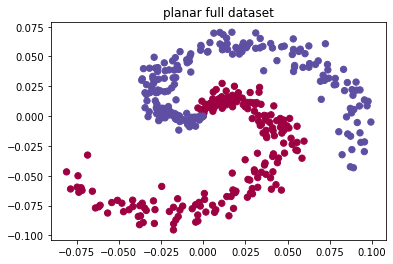

In [937]:
# create dataset
X,y = load_planar_dataset(K=2,m = 400)
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=y,s = 40,cmap = plt.cm.Spectral)
plt.title("planar full dataset")
plt.show()

In [938]:
def nn_model(X,Y,n_h,lr = 0.1,num_iterations = 10000,milestone = 1000,print_cost = False):
    '''
    Neural network training model
    
    Arguments:
    X --- the features
    Y --- the labels
    n_h --- the node number in hiddent layer
    lr --- the learning rate
    num_iterations --- the number interations
    milestone --- the step that we print out loss
    print_cost --- print cost option
    
    Return:
    parameters --- the parameters after training
    history --- the log loss list
    '''
    
    np.random.seed(3)
    n_x,_,n_y = layer_sizes(X,Y)
    
    # Initialize parameters,then retrieve W1,b1,W2,b2 Inputs:
    # 'n_x,n_h,n_y' Outputs = 'W1,b1,W2,b2, parameters'
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    history = []
    
    for i in range(0,num_iterations):
        
        # Forward propagation, Inputs: 'X,parameters', Outputs: 'A2,cache'.
        A2,cache = forward_propagation(X,parameters)
        
        # Cost function, Inputs: 'A2,Y,parameters', Outputs: 'cost'.
        cost = compute_cost(A2,Y)
        history.append(cost)
        
        # Backpropagation, Inputs: 'parameters, cache, X, Y', Outputs: 'grads'.
        grads = backward_propagation(parameters,cache,X,Y)
        
        # Gradient descent parameter update, Inputs: 'parameters,grads', Outputs: 'parameters'
        parameters = update_parameters(parameters,grads,lr=lr)
        
        if print_cost and i % milestone == 0:
            print('Cost after iteration %i: %f' %(i,cost))
    
    return parameters,history

In [939]:
parameters,history = nn_model(X,Y,3,lr = 0.005,num_iterations = 50000,milestone = 5000,print_cost =True)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693154
Cost after iteration 5000: 0.427062
Cost after iteration 10000: 0.191432
Cost after iteration 15000: 0.113359
Cost after iteration 20000: 0.087513
Cost after iteration 25000: 0.077799
Cost after iteration 30000: 0.072198
Cost after iteration 35000: 0.068383
Cost after iteration 40000: 0.065578
Cost after iteration 45000: 0.063383
W1 = [[ 52.0369236  -20.10092688 -92.21965439]
 [ 39.23818749 -34.95520243  -7.22247953]]
b1 = [[-2.6413258 ]
 [-2.83126395]
 [ 0.90246907]]
W2 = [[ 22.60665237]
 [-12.74733447]
 [ 14.53538214]]
b2 = [[0.16602266]]


<AxesSubplot:>

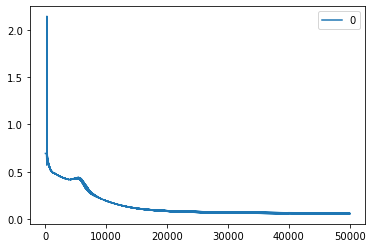

In [940]:
pd.DataFrame(history).plot()

### 4.5 Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [941]:
class model_predict:
    def __init__(self):
        '''
        Model prediction for predict the model
        '''
        self.parameters = None
    def predict(self,X):
        '''
        Predict function
        '''
        A2,cache = forward_propagation(X,self.parameters)
        predictions = (A2 > 0.5)
        return A2

In [942]:
model = model_predict()
model.parameters = parameters
model.parameters

{'W1': array([[ 52.0369236 , -20.10092688, -92.21965439],
        [ 39.23818749, -34.95520243,  -7.22247953]]),
 'b1': array([[-2.6413258 ],
        [-2.83126395],
        [ 0.90246907]]),
 'W2': array([[ 22.60665237],
        [-12.74733447],
        [ 14.53538214]]),
 'b2': array([[0.16602266]])}

In [943]:
predictions = model.predict(X)
predictions

array([[7.05999423e-01],
       [7.16297834e-01],
       [6.94671095e-01],
       [7.35890260e-01],
       [6.85714417e-01],
       [6.27327524e-01],
       [7.54675586e-01],
       [6.67347054e-01],
       [6.30748573e-01],
       [6.88037384e-01],
       [7.73482689e-01],
       [8.05157386e-01],
       [4.77122897e-01],
       [4.73018083e-01],
       [1.26756058e-02],
       [9.14863346e-01],
       [1.84037357e-01],
       [8.44303980e-02],
       [5.98553775e-03],
       [2.80114887e-02],
       [3.93056464e-01],
       [4.58920521e-02],
       [5.54118305e-03],
       [5.24106662e-02],
       [8.14132648e-04],
       [7.48717131e-01],
       [1.39380674e-05],
       [1.37351134e-05],
       [5.27225115e-03],
       [5.56325536e-05],
       [2.90220713e-04],
       [1.00074140e-02],
       [6.67441038e-05],
       [1.23751638e-06],
       [1.71622715e-04],
       [8.78987803e-05],
       [1.09966815e-05],
       [8.56527290e-07],
       [6.34274329e-08],
       [2.74202517e-05],


In [944]:
loss = compute_cost(predictions,Y)
loss

0.061579250900293606

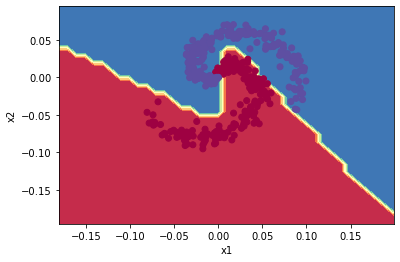

In [945]:
plot_decision_boundary(model,X,Y)

### 4.6 - Tuning hidden layer size (optional/ungraded exercise) ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

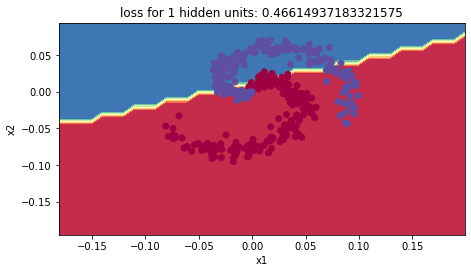

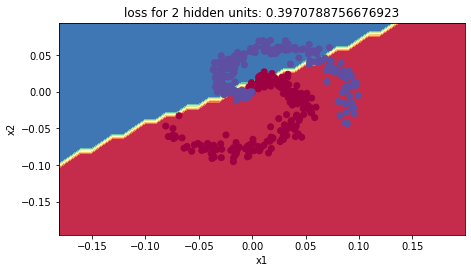

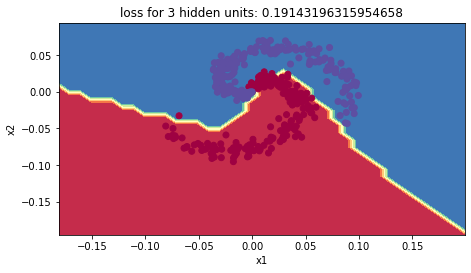

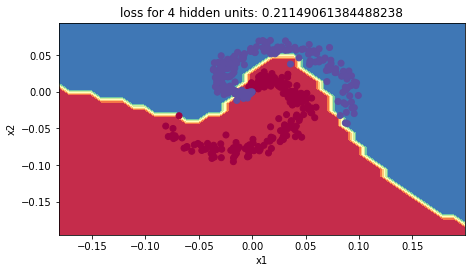

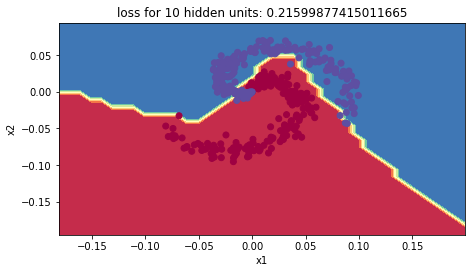

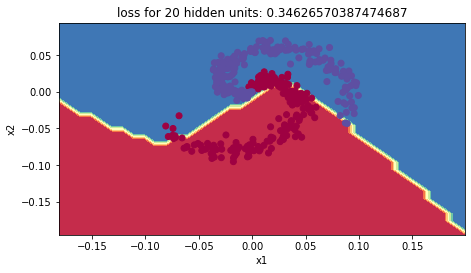

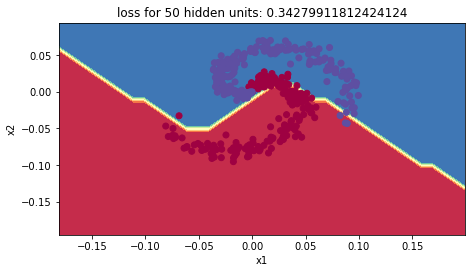

In [961]:
hidden_layer_sizes = [1,2,3,4,10,20,50]
for i,n_h in enumerate(hidden_layer_sizes):
    plt.figure(figsize= (16,32))
    plt.subplot(len(hidden_layer_sizes),2,i+1)
    parameters,history = nn_model(X,Y,n_h,lr = 0.005,num_iterations = 10000,milestone = 2000)
    model = model_predict()
    model.parameters = parameters
    predictions = model.predict(X)
    loss = compute_cost(predictions,Y)
    title = "loss for {} hidden units: {}".format(n_h, loss)
    plot_decision_boundary(model,X,Y,title)

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

**Optional questions**:

**Note**: Remember to submit the assignment but clicking the blue "Submit Assignment" button at the upper-right. 

Some optional/ungraded questions that you can explore if you wish: 
- What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
- Play with the learning_rate. What happens?
- What if we change the dataset? (See part 5 below!)

<font color='blue'>
**You've learnt to:**
- Build a complete neural network with a hidden layer
- Make a good use of a non-linear unit
- Implemented forward propagation and backpropagation, and trained a neural network
- See the impact of varying the hidden layer size, including overfitting.

## 5) Performance on other datasets

If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

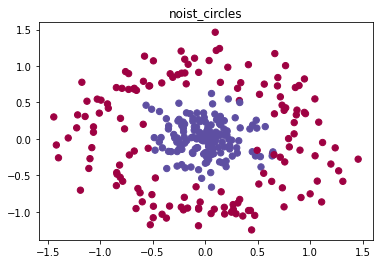

In [829]:
X,y = sklearn.datasets.make_circles(n_samples = 300, factor = 0.2, noise = 0.2)
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=y,s = 40,cmap = plt.cm.Spectral)
plt.title("noist_circles")
plt.show()

### 5/ multi classification neural network

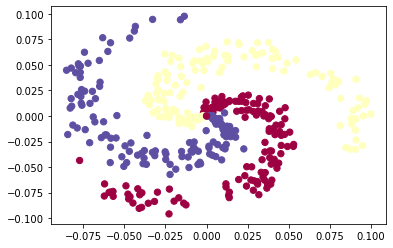

In [1043]:
X,Y = load_planar_dataset(K=3)
# let visualize the data:
plt.scatter(X[:,0],X[:,1],c=Y,s = 40,cmap = plt.cm.Spectral)
plt.show()

In [1044]:
print(X.shape)

(400, 2)


In [1045]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state =11,test_size = 0.2)

In [1046]:
X_train.shape

(320, 2)

In [1047]:
y_train.shape

(320, 1)

In [1068]:
y_train

array([[0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
    

In [1069]:
tf.random.set_seed(11)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ['accuracy'])

history = model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6756 - accuracy: 0.3313
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.3125
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.3125
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.3125
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.3125
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.3125
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.3125
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.3125
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4250 - accuracy: 0.3125
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.3125
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.3125
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.3125
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.3125
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.3125
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.3125
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.3125
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1815 - accuracy: 0.3125
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.3125
Epoch 90/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.3125
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.3125
Epoch 92/100


<AxesSubplot:title={'center':'loss curve'}>

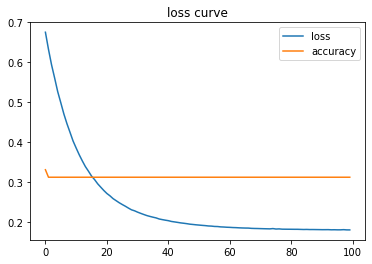

In [1070]:
pd.DataFrame(history.history).plot(title ='loss curve')

In [1071]:
model.evaluate(X_test,y_test,verbose =1)

3/3 [==============================] - 0s 3ms/step - loss: -0.4162 - accuracy: 0.4125


[-0.4162139296531677, 0.4124999940395355]

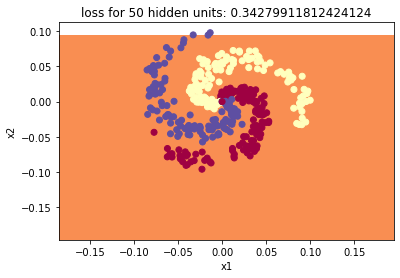

In [1072]:
plot_decision_boundary(model,X,Y,title)

Congrats on finishing this Programming Assignment!

Reference:
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/